# Project Python Foundations: FoodHub Data Analysis

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost_of_the_order: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [ ]:
# @title
# Installing the libraries with the specified version.
!pip install numpy==1.25.2 pandas==1.5.3 matplotlib==3.7.1 seaborn==0.13.1 -q --user

**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the start again.*

In [ ]:
# @title
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

### Understanding the structure of the data

In [ ]:
# uncomment and run the following lines for Google Colab

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Write your code here to read the data

df = pd.read_csv('/content/drive/My Drive/AI Cert Course/Python Foundations -- Project 1/foodhub_order.csv')

In [ ]:
# Write your code here to view the first 5 rows

df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [ ]:
# Write your code here

df.shape

(1898, 9)

#### Observations:
There are 1,898 rows and 9 columns.

### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [ ]:
# Write your code here

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations:
There are 5 columns with numerical values including int64 (4 columns) and float64 (1 column), and 4 columns with object (categorical) values. The rating column inclues "Not rated" string values, which caused it to be read as an object rather than numerical column.

### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. [1 mark]

In [ ]:
# Write your code here
df.isnull().sum()

,0
order_id,0
customer_id,0
restaurant_name,0
cuisine_type,0
cost_of_the_order,0
day_of_the_week,0
rating,0
food_preparation_time,0
delivery_time,0


#### Observations:
There are no missing values in the data. This is confirmed by the isnull() function, as well as the .info() function previously called.

### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [ ]:
# @title
# Write your code here
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
order_id,1898.0,NaN,NaN,NaN,1477495.5,548.049724,1476547.0,1477021.25,1477495.5,1477969.75,1478444.0
customer_id,1898.0,NaN,NaN,NaN,171168.478398,113698.139743,1311.0,77787.75,128600.0,270525.0,405334.0
restaurant_name,1898,178,Shake Shack,219,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cuisine_type,1898,14,American,584,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cost_of_the_order,1898.0,NaN,NaN,NaN,16.498851,7.483812,4.47,12.08,14.14,22.2975,35.41
day_of_the_week,1898,2,Weekend,1351,NaN,NaN,NaN,NaN,NaN,NaN,NaN
rating,1898,4,Not given,736,NaN,NaN,NaN,NaN,NaN,NaN,NaN
food_preparation_time,1898.0,NaN,NaN,NaN,27.37197,4.632481,20.0,23.0,27.0,31.0,35.0
delivery_time,1898.0,NaN,NaN,NaN,24.161749,4.972637,15.0,20.0,25.0,28.0,33.0


#### Observations:
For food preparation time, the minimum is 20 minutes. The average is 27 minutes 37 seconds. The maximum is 35 minutes.

### **Question 5:** How many orders are not rated? [1 mark]

In [ ]:
# @title
# Write the code here
df['rating'].value_counts()

,count
rating,
Not given,736
5,588
4,386
3,188


#### Observations:
736 orders are not rated.

### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

Unique order IDs:  1898 

Unique customer IDs:  1200 

Top customers: 
 customer_id
52832     13
47440     10
83287      9
250494     8
259341     7
65009      7
276192     7
82041      7
115213     6
60052      6
Name: count, dtype: int64


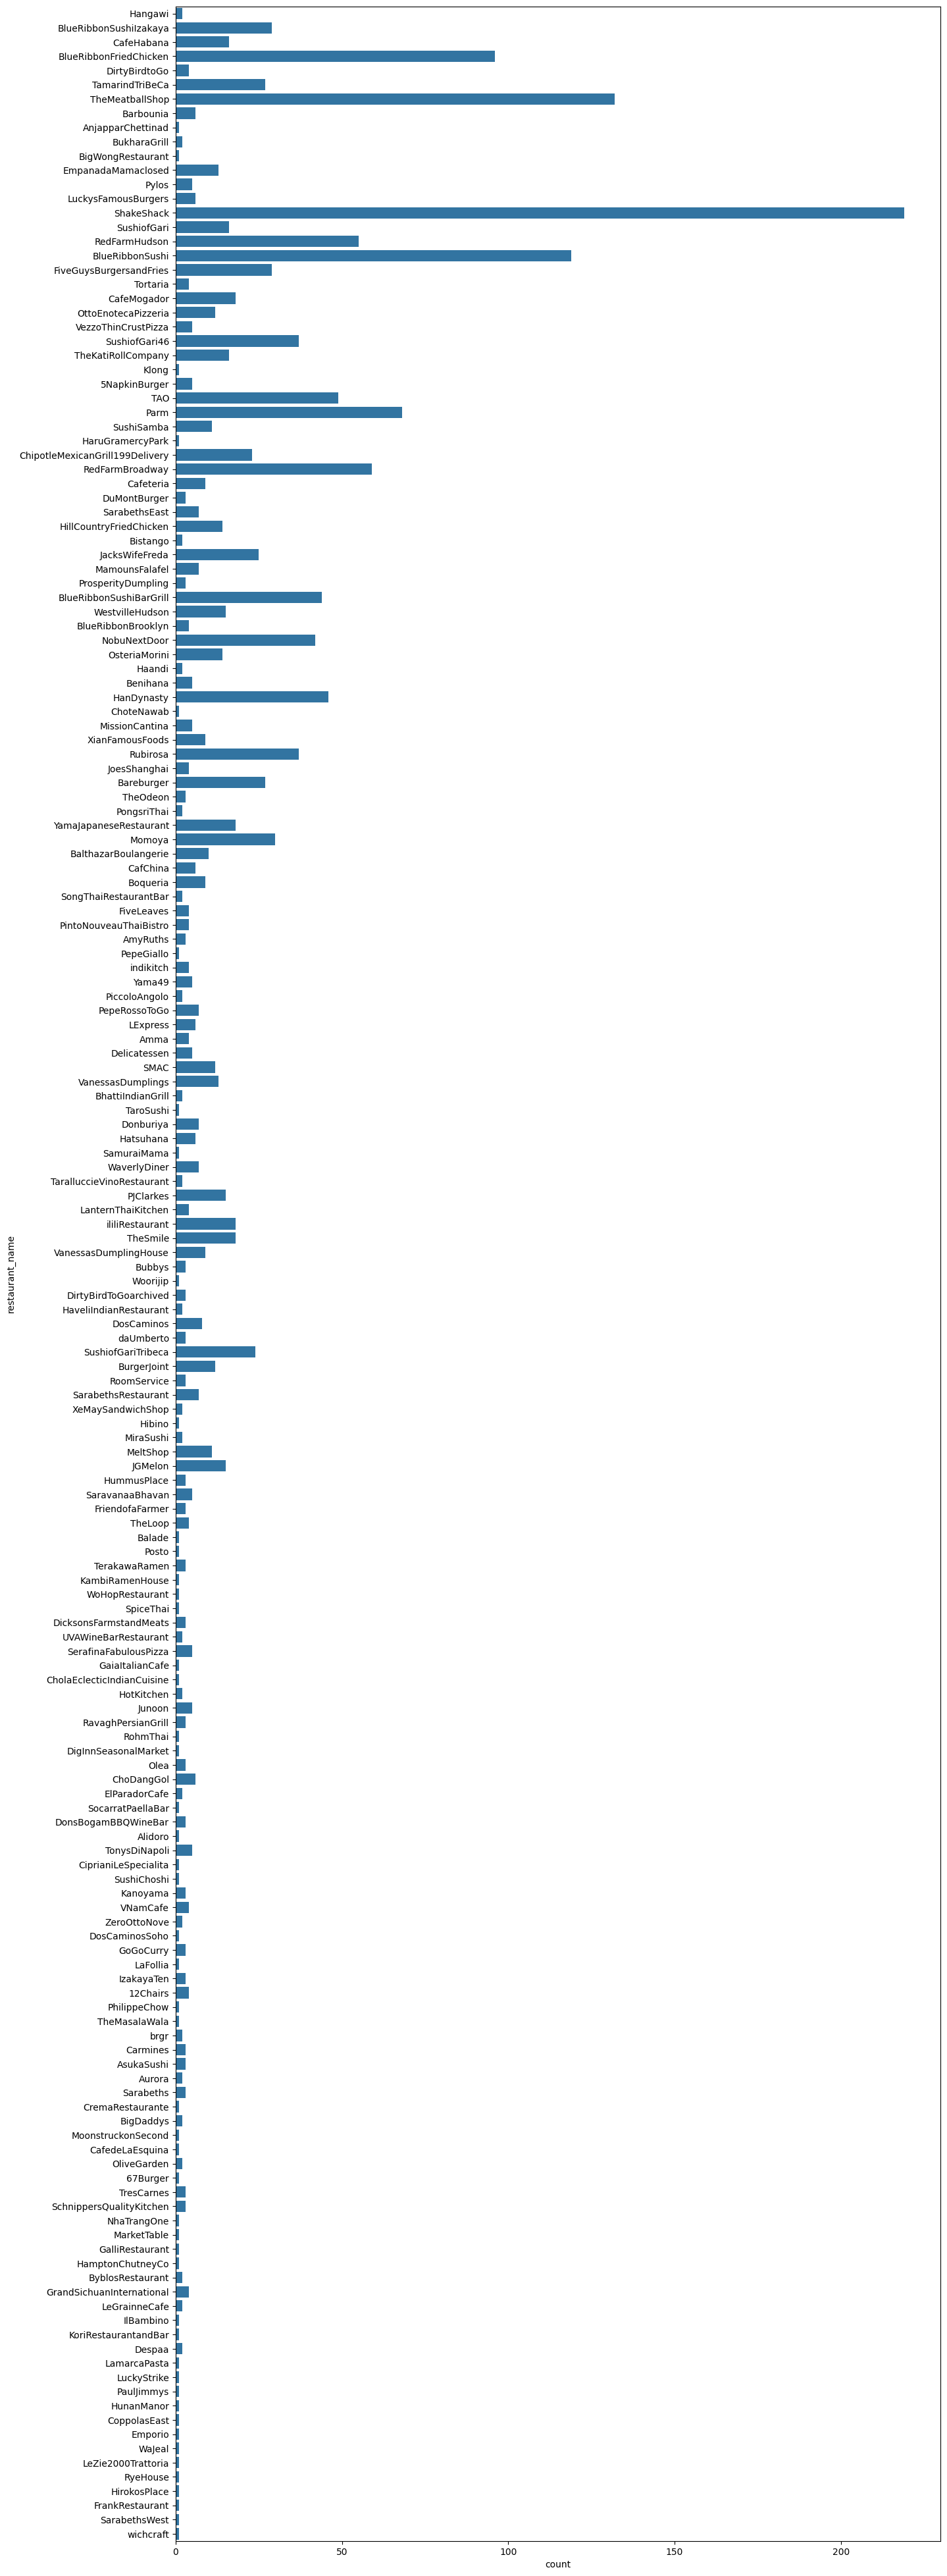

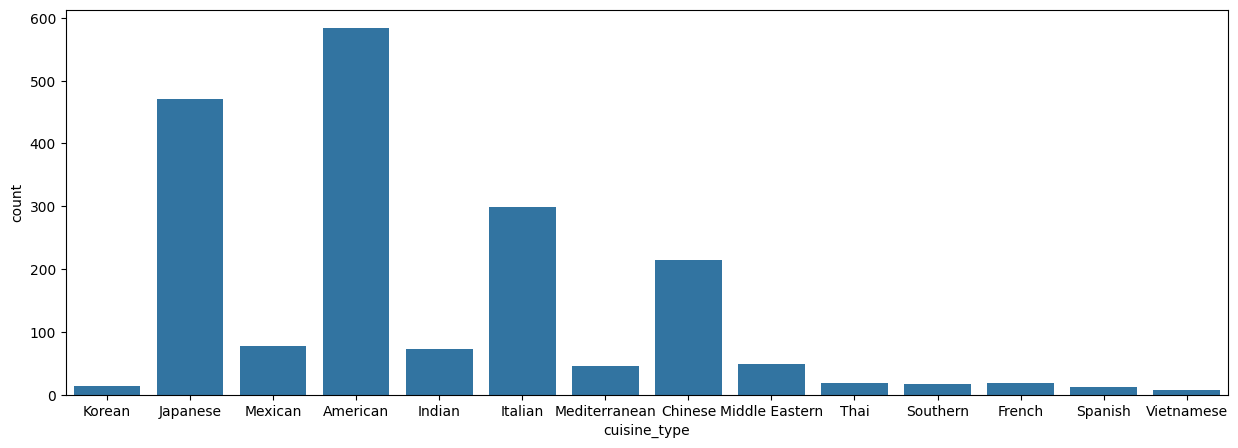

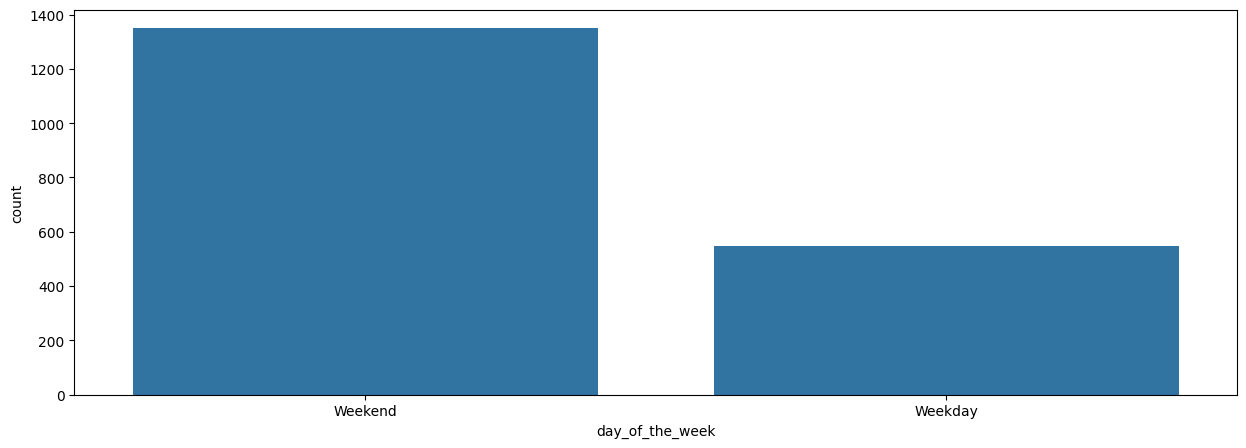

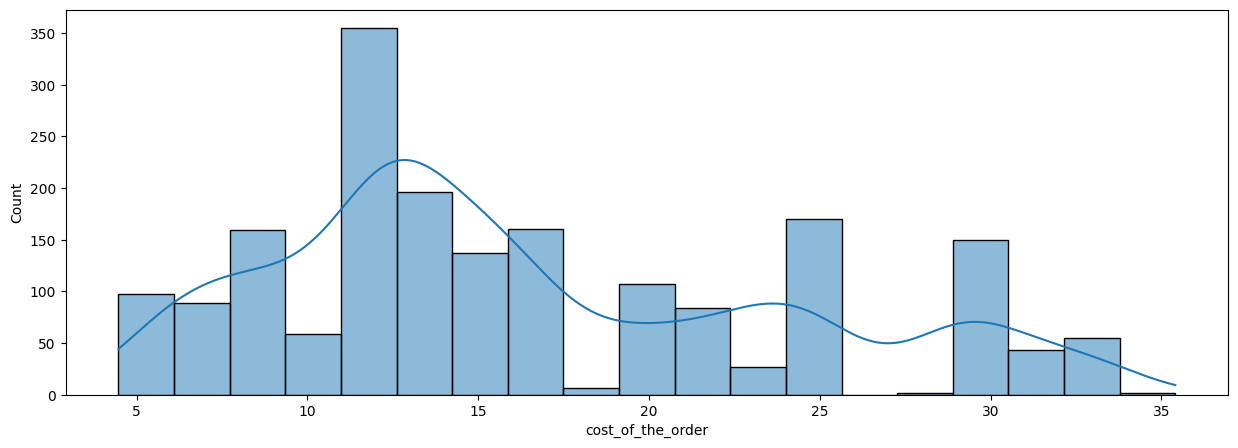

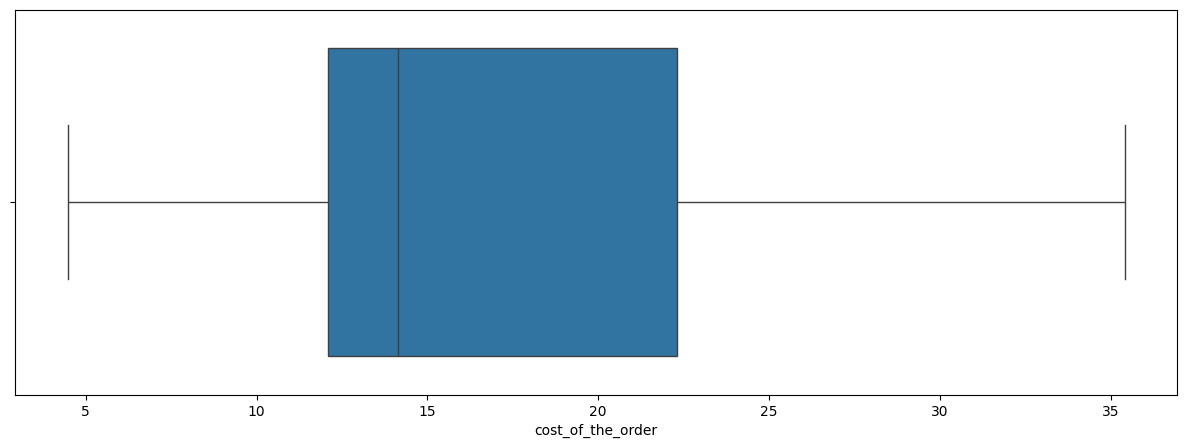

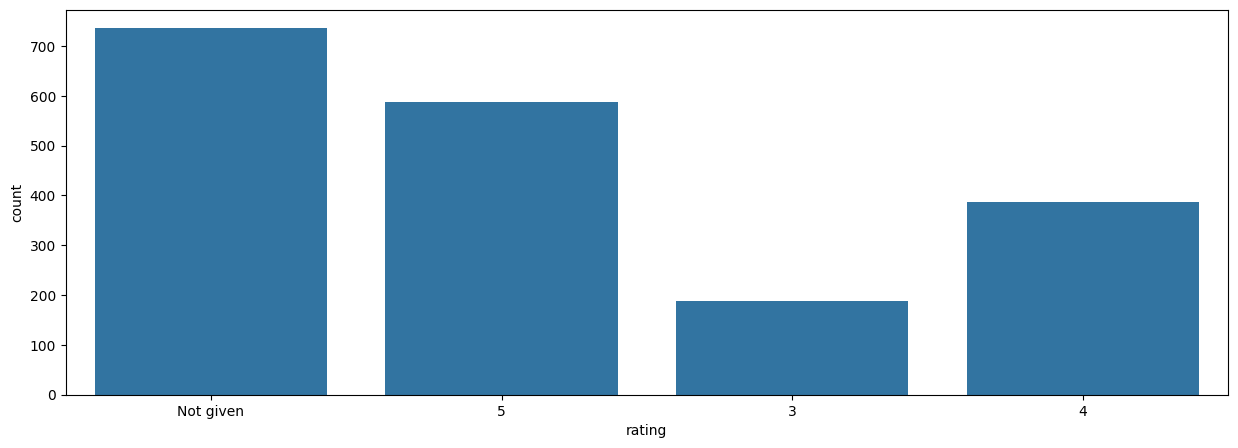

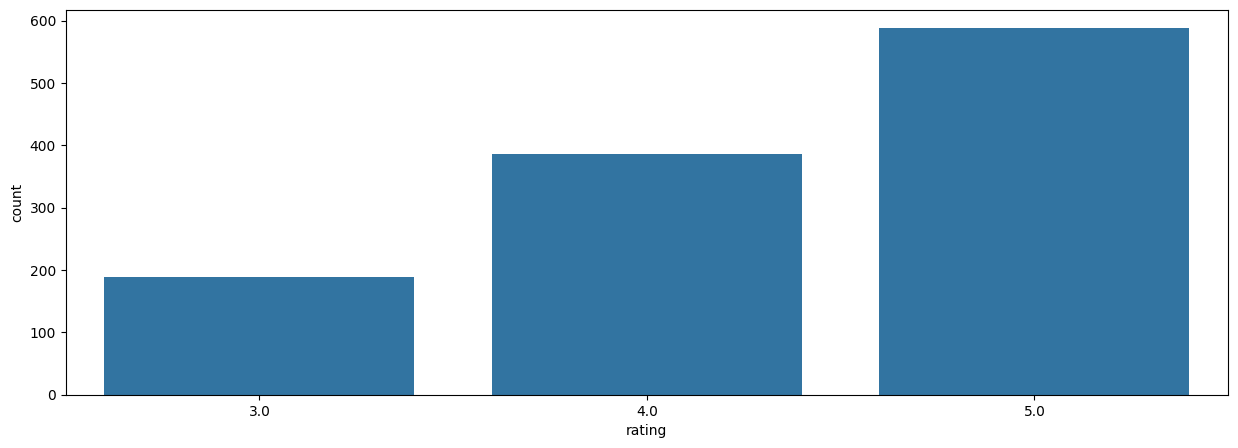

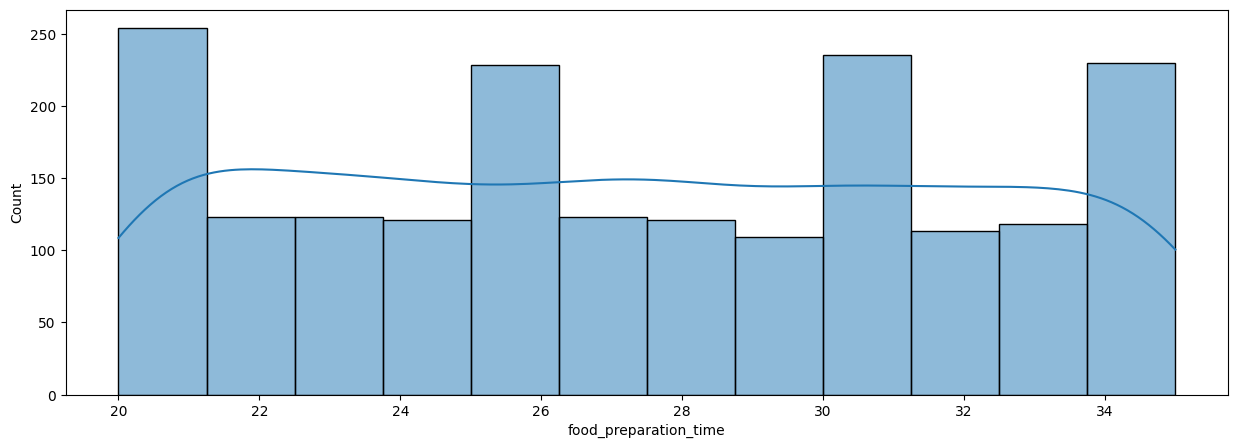

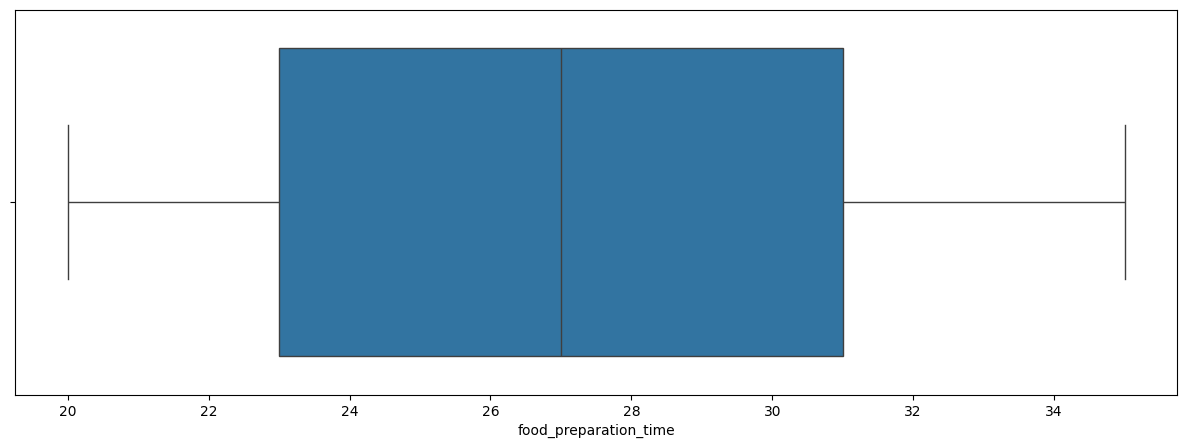

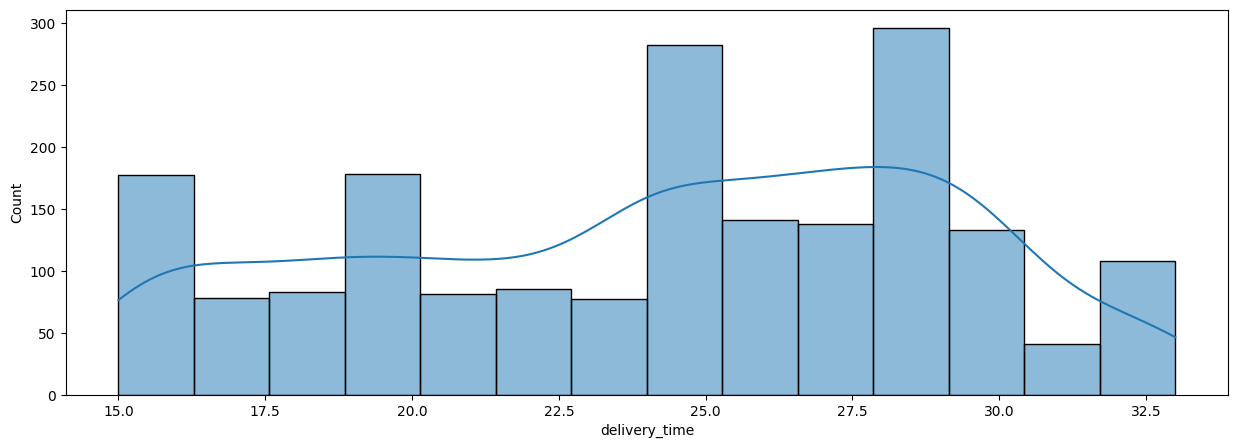

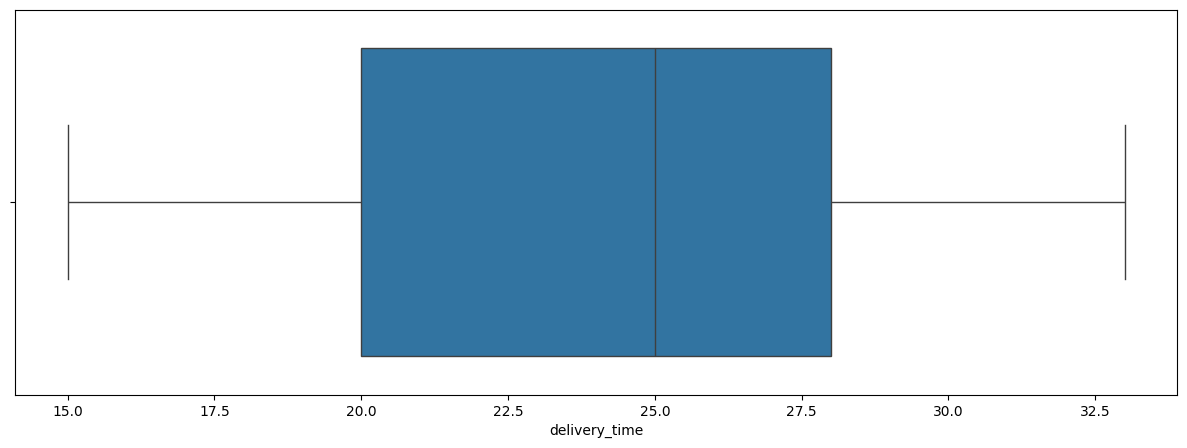

In [ ]:
# Write the code here

#order_id
#check the number of unique variables in the order ID column -- should be 1,898 since order IDs should not repeat
#order IDs are basically a categorical value in this context and don't have much value for analysis
print("Unique order IDs: ", df['order_id'].nunique(), "\n")

#customer_id
#check the number of unique variables in the customer ID column
print("Unique customer IDs: ", df['customer_id'].nunique(), "\n")

#see the top 10 customer IDs by order count
customerids = df['customer_id'].value_counts()
print("Top customers: \n", customerids[0:10])

#restaurant_name

#removing special characters in restaurant name column to get rid of font error messages
import re

def remove_special_characters(text):
  pattern = r'[^a-zA-Z0-9]'
  newtext = re.sub(pattern, '', text)
  return newtext

df['restaurant_name'] = df['restaurant_name'].apply(remove_special_characters)

#rotate the plot since the list of restaurants is lengthy, and enlarge for easier viewing
plt.figure(figsize=(15,50))
restplot = sns.countplot(data=df, y='restaurant_name');
plt.show()

#cuisine_type

plt.figure(figsize=(15,5))
cuisineplot = sns.countplot(data=df, x='cuisine_type');
plt.show()

#day of the week

plt.figure(figsize=(15,5))
wkplot = sns.countplot(data=df, x='day_of_the_week');
plt.show()

#cost of the order

plt.figure(figsize=(15,5))
ordercosthist = sns.histplot(data=df, x='cost_of_the_order', kde=True);
plt.show()

plt.figure(figsize=(15,5))
ordercostbox = sns.boxplot(data=df, x='cost_of_the_order');
plt.show()

#rating

plt.figure(figsize=(15,5))
ratingplot = sns.countplot(data=df, x='rating');
plt.show()

#a look at ratings without "Not given" values--
#start by replacing 'Not given' to NANs
df['rating'] = df['rating'].replace(['Not given'],np.nan)

#not imputing values to replace the NANs since a majority of the ratings values are now NANs
#imputing values when we have that many NANs may improperly skew data and we can do analysis with the ratings values we do have
#convert the column to floats since the "Not given" values caused column to be read as strings
df['rating'] = df['rating'].astype(float)

plt.figure(figsize=(15,5))
ratingplot = sns.countplot(data=df, x='rating');
plt.show()

#food prep time

plt.figure(figsize=(15,5))
foodprephist = sns.histplot(data=df, x='food_preparation_time', kde=True);
plt.show()

plt.figure(figsize=(15,5))
foodprepbox = sns.boxplot(data=df, x='food_preparation_time');
plt.show()

#delivery time

plt.figure(figsize=(15,5))
deliveryhist = sns.histplot(data=df, x='delivery_time', kde=True);
plt.show()

plt.figure(figsize=(15,5))
deliverybox = sns.boxplot(data=df, x='delivery_time');

### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

In [ ]:
# Write the code here
df.value_counts('restaurant_name') #value_counts() by default sorts in descending order

,count
restaurant_name,
ShakeShack,219
TheMeatballShop,132
BlueRibbonSushi,119
BlueRibbonFriedChicken,96
Parm,68
...,...
TheMasalaWala,1
WoHopRestaurant,1
Woorijip,1


#### Observations:
The top five restaurants by number of orders received are Shake Shack (219), The Meatball Shop (132), Blue Ribbon Sushi (119), Blue Ribbon Fried Chicken (96), and Parm (68).

### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

In [ ]:
# Write the code here
popwkdcuisine = (df.groupby(['day_of_the_week'])['cuisine_type']).value_counts()
popwkdcuisine

day_of_the_week  cuisine_type  
Weekday          American          169
                 Japanese          135
                 Italian            91
                 Chinese            52
                 Indian             24
                 Mexican            24
                 Middle Eastern     17
                 Mediterranean      14
                 Southern            6
                 French              5
                 Thai                4
                 Vietnamese          3
                 Korean              2
                 Spanish             1
Weekend          American          415
                 Japanese          335
                 Italian           207
                 Chinese           163
                 Mexican            53
                 Indian             49
                 Mediterranean      32
                 Middle Eastern     32
                 Thai               15
                 French             13
                 Korean             11
                 Southern           11
                 Spanish            11
                 Vietnamese          4
Name: count, dtype: int64

#### Observations:
The most popular weekend cuisine is American, with 415 orders.

### **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]

In [ ]:
# Write the code here
float(((df['cost_of_the_order'] > 20).sum()) / df.shape[0] * 100) #find the orders that cost more than $20, tally them up, then find the percentage out of all orders

29.24130663856691

#### Observations:
29.24% of the orders cost more than \$20.

### **Question 10**: What is the mean order delivery time? [1 mark]

In [ ]:
# Write the code here
float(df['delivery_time'].mean())

24.161749209694417

#### Observations:
The mean order delivery time is 24 minutes 16 seconds. This is also confirmed in the .info() function previously called.

### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [ ]:
# Write the code here
df['customer_id'].value_counts()

,count
customer_id,
52832,13
47440,10
83287,9
250494,8
259341,7
...,...
143926,1
89574,1
157711,1


#### Observations:
The top 3 customers are:


*   52832, with 13 orders
*   47440, with 10 orders
*   83287, with 9 orders



### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]


In [ ]:
# Write the code here

#restaurant/day of the week
plt.figure(figsize=(15,50))
restdayplot = sns.countplot(data=df, y='restaurant_name', hue='day_of_the_week')
plt.show()

#rating/restaurant
plt.figure(figsize=(15,70))
restratingplot = sns.countplot(data=df, y='restaurant_name', hue='rating')
plt.show()

#cuisine type/day of the week
plt.figure(figsize=(15,5))
cuisinedayplot = sns.countplot(data=df, x='cuisine_type', hue='day_of_the_week')
plt.show()

#cusine type/food prep time
plt.figure(figsize=(15, 5))
cuisinefoodprepplot = sns.boxplot(data=df, x='cuisine_type', y='food_preparation_time')
plt.show()

#cost of the order/restaurant
plt.figure(figsize=(15, 50))
costrestplot = sns.boxplot(data=df, x='cost_of_the_order', y='restaurant_name')
plt.show()

#cost of the order/day of the week
plt.figure(figsize=(15,5))
costdayhist = sns.histplot(data=df, x='cost_of_the_order', hue='day_of_the_week', kde='True')
plt.show()

plt.figure(figsize=(15,5))
costdaybox = sns.boxplot(data=df, x='cost_of_the_order', hue='day_of_the_week')
plt.show()

#cost of the order/cuisine type
plt.figure(figsize=(15, 8))
costcuisineplot = sns.boxplot(data=df, x='cost_of_the_order', y='cuisine_type')
plt.show()

#cost of the order/rating
#since "not rated" was converted to NANs, we'll only see actual ratings
plt.figure(figsize=(15, 10))
costratingplot = sns.histplot(data=df, x='cost_of_the_order', hue='rating')
plt.show()

#delivery time/day of the week
plt.figure(figsize=(15,5))
delivdaybox = sns.boxplot(data=df, x='delivery_time', y='day_of_the_week')
plt.show()

plt.figure(figsize=(15,5))
delivdayhist = sns.histplot(data=df, x='delivery_time', hue='day_of_the_week', kde='True')
plt.show

#delivery time/cost of the order
plt.figure(figsize=(15,5))
delivcostplot = sns.lineplot(data=df, x='delivery_time', y='cost_of_the_order', )
plt.show()

#delivery time/rating
plt.figure(figsize=(15, 5))
delivratingplot = sns.histplot(data=df, x='delivery_time', hue='rating', kde=True)
plt.show()

#delivery time/restaurant
plt.figure(figsize=(15,50))
delivrestplot = sns.boxplot(data=df, x='delivery_time', y='restaurant_name')
plt.show()

#food prep time/restaurant
plt.figure(figsize=(15,50))
foodpreprestplot = sns.boxplot(data=df, x='food_preparation_time', y='restaurant_name')
plt.show()

#food prep time/day of the week
plt.figure(figsize=(15,5))
foodprepdaybox = sns.boxplot(data=df, x='food_preparation_time', y='day_of_the_week')
plt.show()

plt.figure(figsize=(15,5))
foodprepdayhist = sns.histplot(data=df, x='food_preparation_time', hue='day_of_the_week', kde='True')
plt.show()

#food prep time/cost of the order
plt.figure(figsize=(15,5))
foodprepcostplot = sns.lineplot(data=df, x='food_preparation_time', y='cost_of_the_order')
plt.show()

#rating/food prep time
plt.figure(figsize=(15,5))
foodprepratingplot = sns.histplot(data=df, x='food_preparation_time', hue='rating', kde=True)
plt.show()

#rating/cost of the order
plt.figure(figsize=(15, 5))
ratingcostplot = sns.boxplot(data=df, x='rating', y='cost_of_the_order');
plt.show()

#rating/day of the week
plt.figure(figsize=(15,5))
ratingdayplot = sns.countplot(data=df, x='rating', hue='day_of_the_week')
plt.show()

#rating/cuisine
plt.figure(figsize=(15,5))
ratingcuisineplot = sns.countplot(data=df, x='rating', hue='cuisine_type')
plt.show()

#numerical variables
numpairplot= sns.pairplot(data=df, vars=['cost_of_the_order', 'rating', 'food_preparation_time', 'delivery_time'], hue='day_of_the_week', corner=True);
plt.show()

numheat = sns.heatmap(data=df[['cost_of_the_order', 'rating', 'food_preparation_time', 'delivery_time']].corr(), annot=True, cmap='YlGnBu');
plt.show()

Output hidden; open in https://colab.research.google.com to view.


### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [ ]:
# Write the code here

#find the restaurants with 50+ reviews

#get the ratings count for each resaurant -- "Not rated" values previously replaced
ratingcounts = (df.groupby(['restaurant_name'])['rating']).count() #count() function tallies non-NAN values
rests50plusratings = pd.DataFrame(ratingcounts.loc[ratingcounts > 50])
rests50plusratings = rests50plusratings.rename(columns={'rating': 'rating_counts'}) #rename rating column to rating counts for clarity later
rests50plusratings

,rating_counts
restaurant_name,
BlueRibbonFriedChicken,64
BlueRibbonSushi,73
ShakeShack,133
TheMeatballShop,84


In [ ]:
#find the restaurants with 4+ average rating
avgrestratings = (df.groupby(['restaurant_name'])['rating']).mean() #mean function ignores NAN values
resttopratings = pd.DataFrame(avgrestratings.loc[avgrestratings > 4])
resttopratings

,rating
restaurant_name,
12Chairs,4.500000
67Burger,5.000000
Amma,4.500000
AnjapparChettinad,5.000000
AsukaSushi,5.000000
...,...
YamaJapaneseRestaurant,4.500000
daUmberto,5.000000
ililiRestaurant,4.153846


In [ ]:
#find the restaurants in the top 50 reviews dataframe and the 4+ average rating dataframe
promorests = pd.merge(rests50plusratings, resttopratings, how='inner', on='restaurant_name')
promorests

,rating_counts,rating
restaurant_name,,
BlueRibbonFriedChicken,64,4.328125
BlueRibbonSushi,73,4.219178
ShakeShack,133,4.278195
TheMeatballShop,84,4.511905


#### Observations:
The restaurants that have received more than 50 ratings and have average ratings above 4 include Blue Ribbon Fried Chicken, Blue Ribbon Sushi, Shake Shake, and The Meatball Shop.

### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [ ]:
# Write the code here

def calculaterev(costbase): #create function to find revenue from each order
  if costbase > 20:
    rev = costbase * 0.25
    return rev
  elif costbase > 5:
    rev = costbase * 0.15
    return rev
  else:
    rev = 0
    return rev

df['revenue'] = df['cost_of_the_order'].apply(calculaterev) #apply the function to the cost of the order column, and create new column with each order's revenue
netrev = df['revenue'].sum() #add up the revenue for all orders
float(netrev)

6166.303

#### Observations:
The net revenue across all orders is \$6,166.30.

### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

In [ ]:
# Write the code here

df['total_time'] = df['food_preparation_time'] + df['delivery_time'] #add food prep and delivery times together to find total time from order placement to delivery
float(((df['total_time'] > 60).sum()) / df.shape[0] * 100) #find the percentage that take more than 60 minutes

10.537407797681771

#### Observations:
10.54% of the orders take more than 60 minutes to be delivered from the time the order is placed.

### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

In [ ]:
# Write the code here

(df.groupby(['day_of_the_week'])['delivery_time']).mean()

,delivery_time
day_of_the_week,
Weekday,28.340037
Weekend,22.470022


#### Observations:
The mean delivery time on weekends is 22 minutes and 47 seconds, and the mean delivery time on weekdays is 28 minutes and 34 seconds -- meaning deliveries on weekends are on average 5 minutes 47 seconds shorter.

### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

### Conclusions:
#Univariate analysis:
Restaurant name:
*   Shake Shack is by far the most popular restaurant by order volume.

Cuisine type:
*   In terms of cuisine, American is the most popular choice, followed by Japanese and Italian.
*   Vietnamese is the least popular choice.

Day of the week:
*   Most orders come in on the weekend.
*   More than twice as many orders come in on the weekend as they do during weekdays.

Cost of the order:
* The cost of the order data is slightly right skewed.
* The median is just under 15 dollars (\$14.14)
* Most of the orders (50\%) range from about 12 (12.08) and 22 dollars (22.30).
* The orders cost average is \$16.49.
* There are no outliers.

Rating:
*   Most of the orders were not given a rating.
*   A look at the orders that did receive ratings reveals most received 5s.

Food prep time:
*   The food prep time distribution is multimodal.
*   The median is 27 minutes, with most orders being prepared in 23 to 31 minutes.
*   There are no outliers.

Delivery time:
*   The delivery time distribution is left skewed.
*   The median is 25 minutes, with most orders delivered in 20 to 28 minutes.
*   There are no outliers.

#Bivariate analysis:
* Most restaurants get more orders on the weekends than they do on weekdays with a few exceptions (LExpress, TerakawaRamen get more during the week, ililiRestaurant gets about the same on weekends and weekdays).
* After replacing “Not rated” values with NANs and looking at just the orders that received a rating, most restaurants that did receive ratings had more 5s than 3s or 4s, with a few exceptions (Café Mogador had more 4s than 5s, Cafeteria had more 3s than 4s and no 5s, PepeGiallo had only 3s).
* American cuisine is the most popular on weekends and weekdays, followed by Japanese and Italian.
* All cuisines had higher order counts on weekends than weekdays.
* While Korean cuisine restaurants generaly have relatively low prep times, they are the only ones to have outliers, and they're on the high end.
* NobuNextDoor and Blue Ribbon Sushi have numerous outliers on the high end when it comes to order cost. Blue Ribbon Sushi Bar Grill is the only one to have multiple outliers on the low end.  
* The order cost distribution is mostly the same on weekends as it is on weekdays (skews right), but weekends have a slightly higher median order cost. Weekdays also skew right a bit more than weekends.
* French cuisine has the highest median order cost, while Korean and Vietnamese have the lowest median order costs. Southern has the widest distribution. Mediterranean has the most outliers on the high end, one of which is the highest order cost among the cuisines. Korean has the most outliers on the low end.
* Ratings of 5 make up the majority of the ratings across almost all order cost points, except for the lowest order costs (more 4 ratings than anything else) and highest order costs (only 3s).
* Delivery times tend to be lower on weekends compared to weekdays, and have a wider distribution ranging from 15 to around 30 minutes. Weekday delivery times have a narrower distribution ranging on the higher end -- ranging from around 24 to around 33 minutes.
* Interestingly, lower delivery times do not appear to be associated with higher ratings -- ratings of 5 peak between around 24 and 28 minutes.
* Pinto Nouveau Thai Bistro and Room Service have some of the lowest delivery times, while Junoon and Haandi have some of the highest.
* Olea, VNam Cafe, and Despaa have some of the lowest prep times among the restaurants, while Indikitch and Tonys DiNapoli have some of the highest.
* Food prep times are about the same on weekdays as on weekends.
* The food prep distribution is similar on weekends as on weekdays, and is multimodal.
* The ratings distribution on weekends and weekdays is similar, and skews left (most ratings are 4s and 5s).
* There isn't much correlation among the numerical values; the "strongest" exists between cost and prep time (but even here, it can only be characterized as a "slight" correlation).

### Recommendations:

*  Delivery times are slower during the week than on weekends. Adding more delivery drivers during the week could reduce those wait times. However, that should not be done at the expense of the weekends, given how popular food delivery is on weekends.
* Offering promotions on weekdays could boost sales for weekdays, which are lower across the board (cuisine type, restaurant, etc.) than on weekends.
* It's difficult to assess if the ratings values correspond to the food quality or the delivery experience. Offering customers the ability to provide comments for their rating could help differentiate.
* The median and mean of the cost of the order variable are both below 20 dollars but the company charges 25% if the order is more than 20 dollars. To improve revenue, the company could reduce the threshhold from $20, or it could incentivize customers to place costlier orders through discounts or promotions (this could be better for both the company and the restaurants).
* Since American, Japanese, and Italian cuisines are so popular, the company could add a "cuisines" section to the app homepage featuring all the cuisines represented by all the resaurants, but featuring American, Japanese, and Italian cuisines first. This would allow customers seeking those cuisines to find new restaurant options, and boost order sales for those other restaurants.

---